In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

What is normalization?

scales all numeric variables in the range [0,1]. One possible formula is given below:

<img src="http://file.scirp.org/Html/6-9301607/b3876d5f-0236-40b1-9619-fab78210fff9.jpg" width="300">

Since the range of values of raw data varies widely, in some machine learning algorithms, objective functions will not work properly without normalization. For example, the majority of classifiers calculate the distance between two points by the Euclidean distance. If one of the features has a broad range of values, the distance will be governed by this particular feature. Therefore, the range of all features should be normalized so that each feature contributes approximately proportionately to the final distance.

Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it

In [2]:
df = pd.read_csv('/home/huseinzol05/Desktop/Introduction-DataScience-Python/pandas/data/HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


mean: 201.050336689 std deviation: 49.9414344626


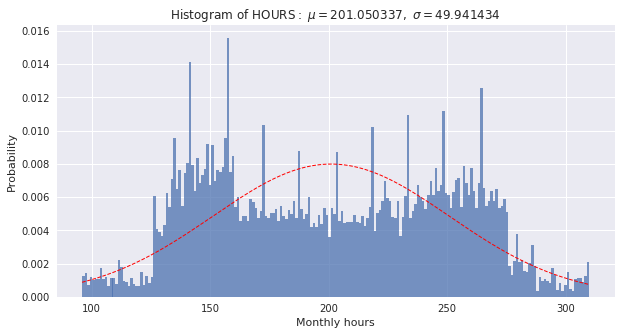

In [3]:
# change to numpy format using .values
average_montly_hours = df['average_montly_hours'].values
mean = average_montly_hours.mean()
std_deviation = average_montly_hours.std()
print('mean:', mean, 'std deviation:', std_deviation)
import matplotlib.mlab as mlab

fig = plt.figure(figsize = (10, 5))
n, bins, patches = plt.hist(average_montly_hours, 200, normed = 1, alpha = 0.75)
# get line
y = mlab.normpdf(bins, mean, std_deviation)
# draw our line
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Monthly hours')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ HOURS:}\ \mu=%f,\ \sigma=%f$' %(mean, std_deviation))
plt.grid(True)

plt.show()

mean: 0.490889423781 std deviation: 0.233371189077


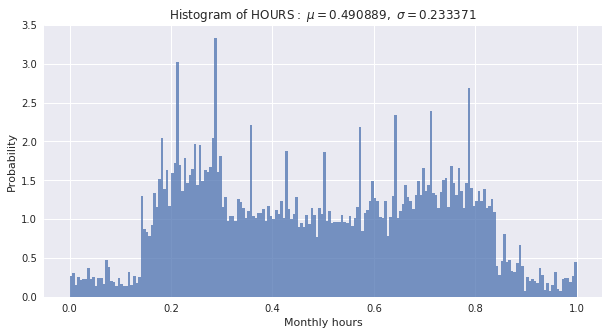

In [7]:
max_val = average_montly_hours.max()
min_val = average_montly_hours.min()
average_montly_hours_norm = (average_montly_hours - min_val) / ((max_val - min_val) * 1.0)
print('mean:', average_montly_hours_norm.mean(), 'std deviation:', average_montly_hours_norm.std())
fig = plt.figure(figsize = (10, 5))
n, bins, patches = plt.hist(average_montly_hours_norm, 200, normed = 1, alpha = 0.75)
# get line
y = mlab.normpdf(bins, mean, std_deviation)
# draw our line
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Monthly hours')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ HOURS:}\ \mu=%f,\ \sigma=%f$' %(average_montly_hours_norm.mean(), average_montly_hours_norm.std()))
plt.grid(True)

plt.show()

Normalization doesnt care about the population distribution, but it still maintain the shape of histogram, and the value is between (0, 1)

Now if we are lazy to calculate mean and standard deviation, there is library we can use

from sklearn.preprocessing import Normalizer

/usr/local/lib/python3.5/dist-packages/sklearn/utils/validation.py:444: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


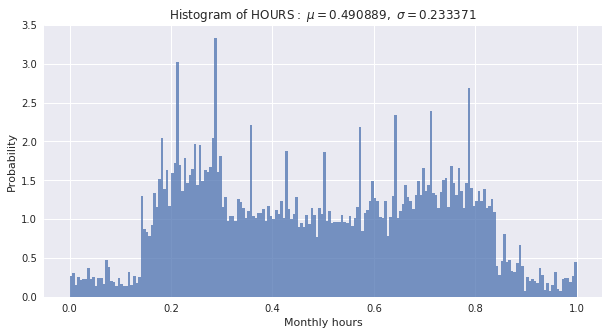

In [9]:
from sklearn.preprocessing import MinMaxScaler

average_montly_hours_new = MinMaxScaler().fit_transform(average_montly_hours.reshape([-1, 1]))
fig = plt.figure(figsize = (10, 5))
n, bins, patches = plt.hist(average_montly_hours_new[:, 0], 200, normed = 1, alpha = 0.75)
y = mlab.normpdf(bins, mean, std_deviation)
l = plt.plot(bins, y, 'r--', linewidth=1)

plt.xlabel('Monthly hours')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ HOURS:}\ \mu=%f,\ \sigma=%f$' %(average_montly_hours_new.mean(), average_montly_hours_new.std()))
plt.grid(True)

plt.show()

Tada! we still got same value!